In [203]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import folium
from folium.plugins import HeatMap

from sklearn.cluster import KMeans


In [205]:
df = pd.read_csv('~/Desktop/masterclass/report/original data.csv')

In [206]:
print("Data Structure Information：")
print(df.info())

Data Structure Information：
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74111 entries, 0 to 74110
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      74111 non-null  int64  
 1   log_price               74111 non-null  float64
 2   property_type           74111 non-null  object 
 3   room_type               74111 non-null  object 
 4   amenities               74111 non-null  object 
 5   accommodates            74111 non-null  int64  
 6   bathrooms               73911 non-null  float64
 7   bed_type                74111 non-null  object 
 8   cancellation_policy     74111 non-null  object 
 9   cleaning_fee            74111 non-null  bool   
 10  city                    74111 non-null  object 
 11  description             74111 non-null  object 
 12  first_review            58247 non-null  object 
 13  host_has_profile_pic    73923 non-null  object 
 14  host_ident

In [209]:
missing_values = df.isnull().sum()   #deleting missing values
print(missing_values)

df_cleaned = df.dropna()
df.dropna(inplace=True)
print(df.info())

id                            0
log_price                     0
property_type                 0
room_type                     0
amenities                     0
accommodates                  0
bathrooms                   200
bed_type                      0
cancellation_policy           0
cleaning_fee                  0
city                          0
description                   0
first_review              15864
host_has_profile_pic        188
host_identity_verified      188
host_response_rate        18299
host_since                  188
instant_bookable              0
last_review               15827
latitude                      0
longitude                     0
name                          0
neighbourhood              6872
number_of_reviews             0
review_scores_rating      16722
thumbnail_url              8216
zipcode                     966
bedrooms                     91
beds                        131
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Index: 38502 entries,

Price

In [6]:
log_price_stats = df['log_price'].describe()
print("Basic description--log_price：")
print(log_price_stats)

Basic description--log_price：
count    38502.000000
mean         4.745546
std          0.658015
min          0.000000
25%          4.304065
50%          4.700480
75%          5.164786
max          7.600402
Name: log_price, dtype: float64


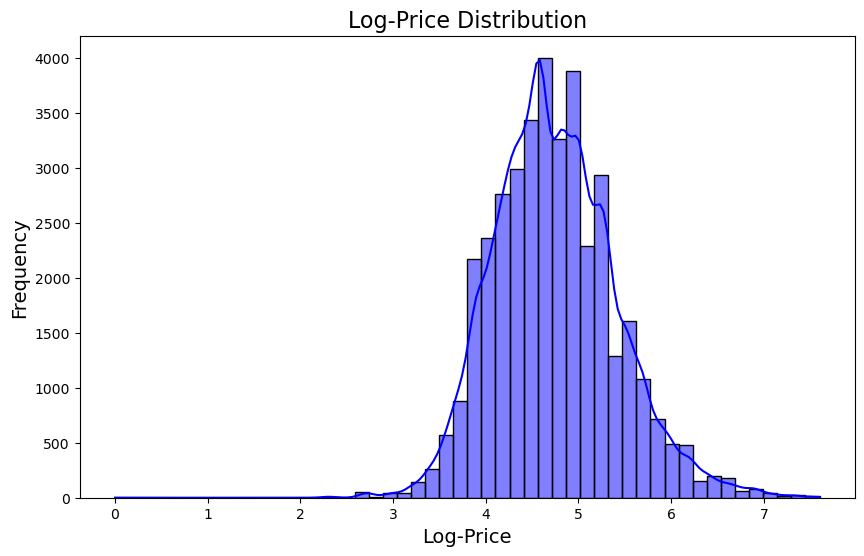

In [7]:
plt.figure(figsize=(10, 6))
sns.histplot(df['log_price'], bins=50, kde=True, color='blue')
plt.title("Log-Price Distribution", fontsize=16)
plt.xlabel("Log-Price", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.show()

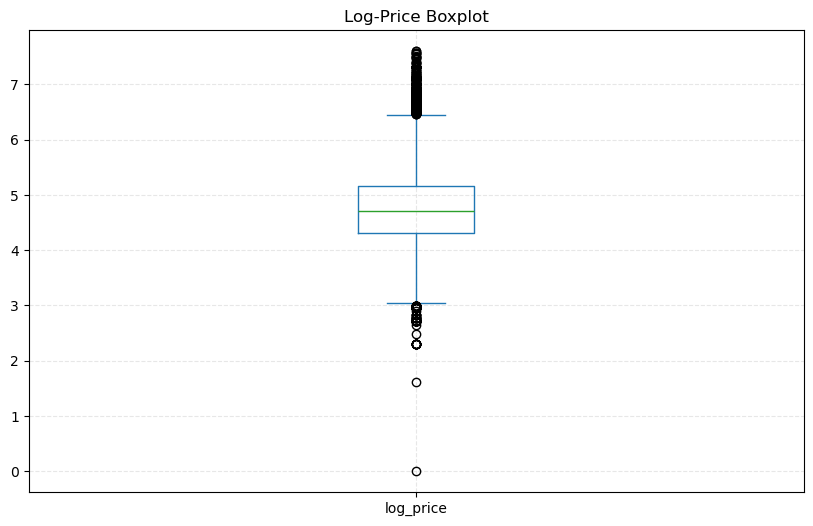

In [8]:
plt.figure(figsize=(10, 6))
df['log_price'].plot.box(title='Log-Price Boxplot')
plt.grid(linestyle="--", alpha=0.3)
plt.show()

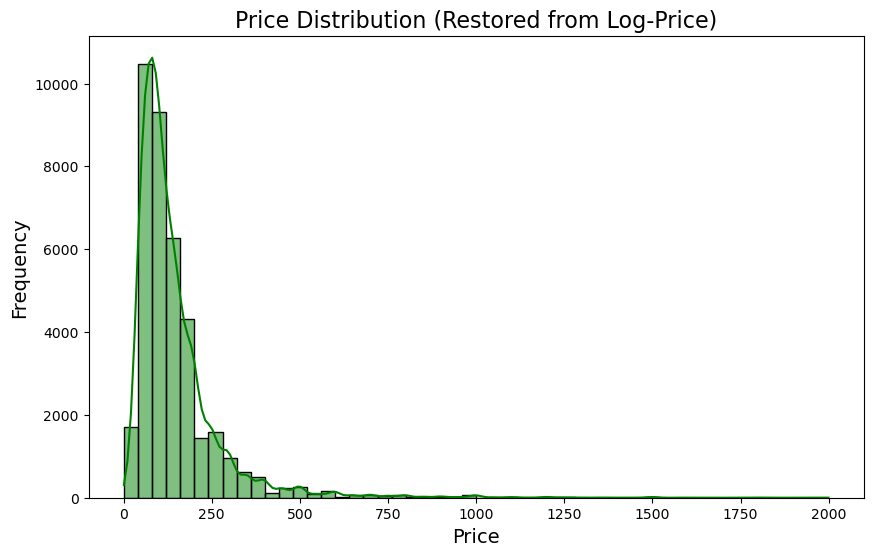

In [9]:
df['price'] = np.exp(df['log_price'])
plt.figure(figsize=(10, 6))
sns.histplot(df['price'], bins=50, kde=True, color='green')
plt.title("Price Distribution (Restored from Log-Price)", fontsize=16)
plt.xlabel("Price", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.show()

In [10]:
price_stats = df['price'].describe()
print("还原后价格的基本统计量：")
print(price_stats)

还原后价格的基本统计量：
count    38502.000000
mean       146.115708
std        130.818062
min          1.000000
25%         74.000000
50%        110.000000
75%        175.000000
max       1999.000001
Name: price, dtype: float64


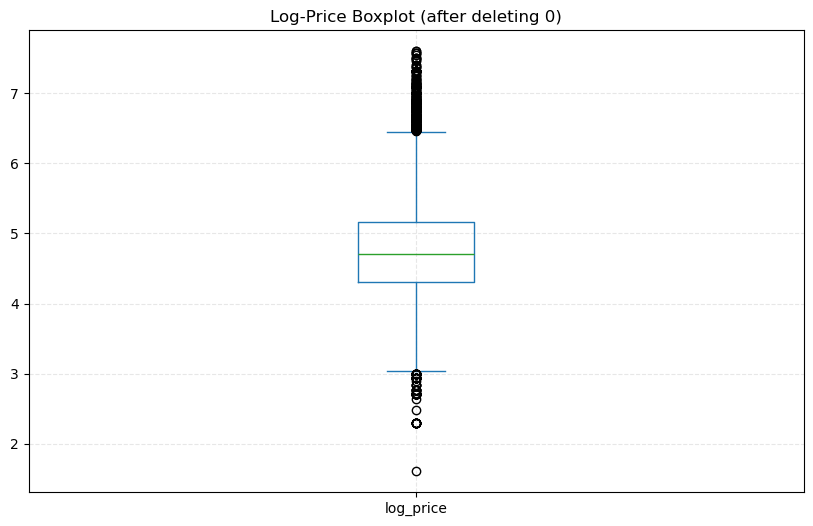

In [181]:
df = df[df['log_price'].notna() & (df['log_price'] != 0)]   #delete missing values or 0
plt.figure(figsize=(10, 6))
df['log_price'].plot.box(title='Log-Price Boxplot (after deleting 0)')
plt.grid(linestyle="--", alpha=0.3)
plt.show()

Property type

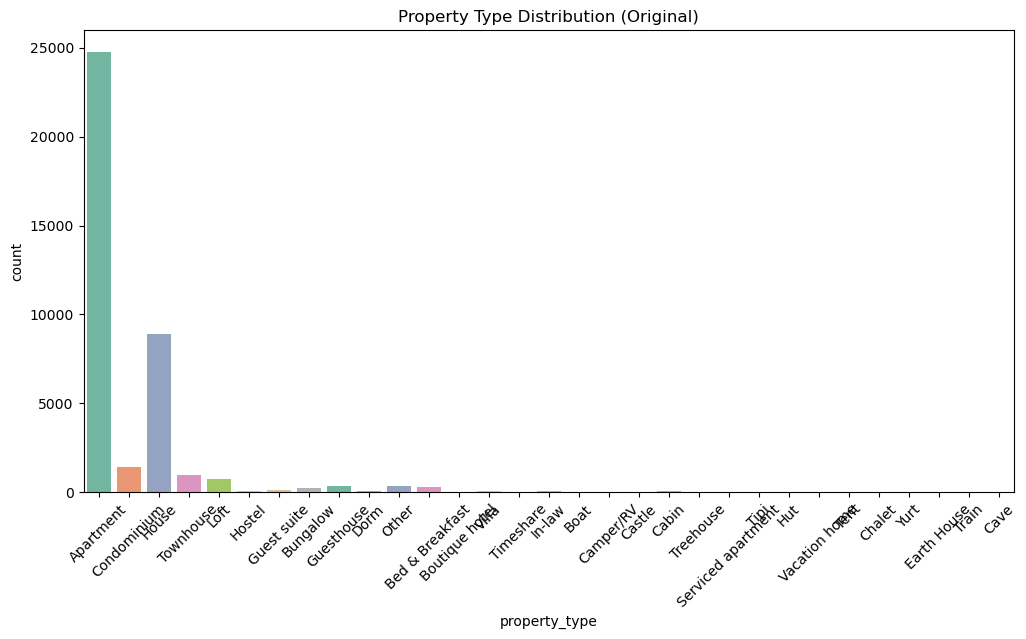

In [13]:
plt.figure(figsize=(12, 6))
sns.countplot(x='property_type', data=df, hue='property_type', palette='Set2', legend=False)
plt.title('Property Type Distribution (Original)')
plt.xticks(rotation=45)  
plt.show()

property_type
Apartment              24752
House                   8903
Condominium             1420
Townhouse                940
Loft                     719
Other_low frequency      599
Guesthouse               335
Other                    331
Bed & Breakfast          286
Bungalow                 216
Name: count, dtype: int64
Series([], Name: count, dtype: int64)
property_type
Apartment              24752
House                   8903
Condominium             1420
Townhouse                940
Loft                     719
Other_low frequency      599
Guesthouse               335
Other                    331
Bed & Breakfast          286
Bungalow                 216
Name: count, dtype: int64


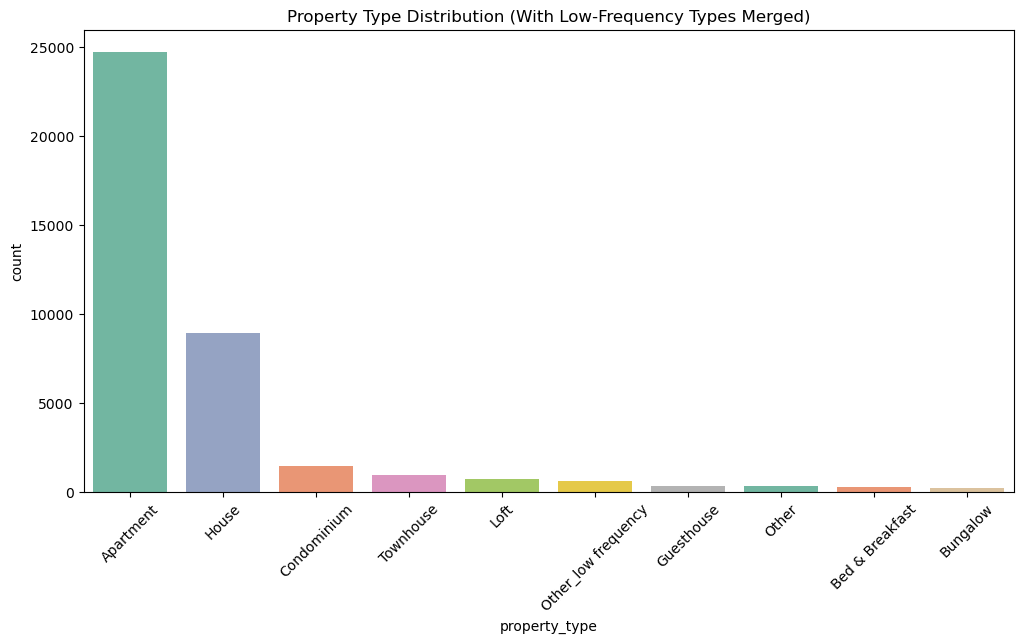

In [65]:
property_type_counts = df['property_type'].value_counts()   #check type
print(property_type_counts)

low_frequency_types = property_type_counts[property_type_counts < 100] #check low-frequency type
print(low_frequency_types)

df['property_type'] = df['property_type'].replace(low_frequency_types.index, 'Other_low frequency')#Consolidate low-frequency type
print(df['property_type'].value_counts())

plt.figure(figsize=(12, 6))
sns.countplot(x='property_type', data=df, hue='property_type', palette='Set2', 
              order=property_type_counts.index, legend=False)
plt.title('Property Type Distribution (With Low-Frequency Types Merged)')
plt.xticks(rotation=45)  
plt.show()

Room type

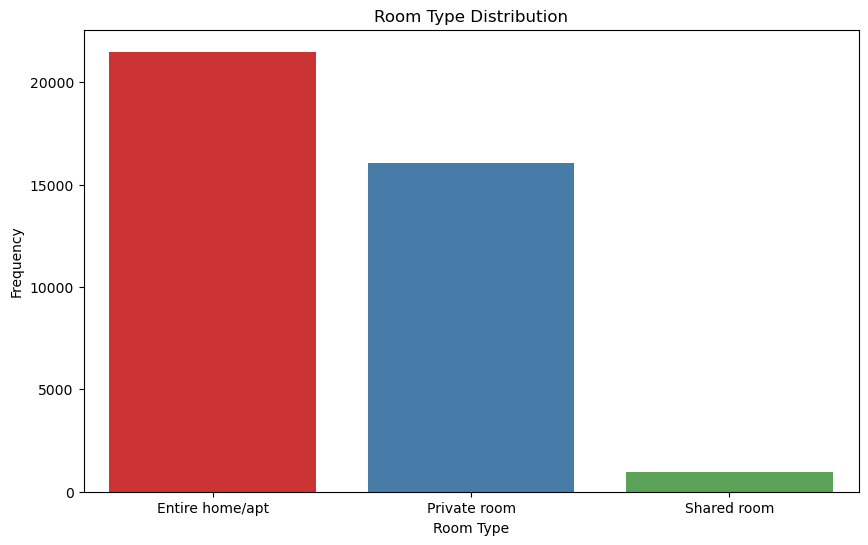

In [68]:
plt.figure(figsize=(10, 6))
sns.countplot(x='room_type', data=df, hue='room_type', palette='Set1', legend=False)
plt.title('Room Type Distribution')
plt.xlabel('Room Type')
plt.ylabel('Frequency')
plt.show()



accommodates

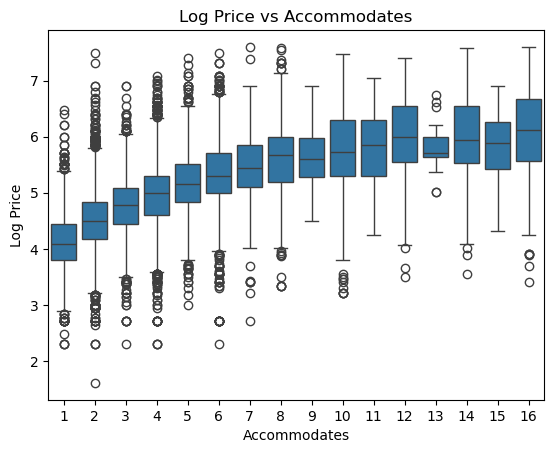

In [71]:
sns.boxplot(data=df, x='accommodates', y='log_price')
plt.title("Log Price vs Accommodates")
plt.xlabel("Accommodates")
plt.ylabel("Log Price")
plt.show()

Bathrooms

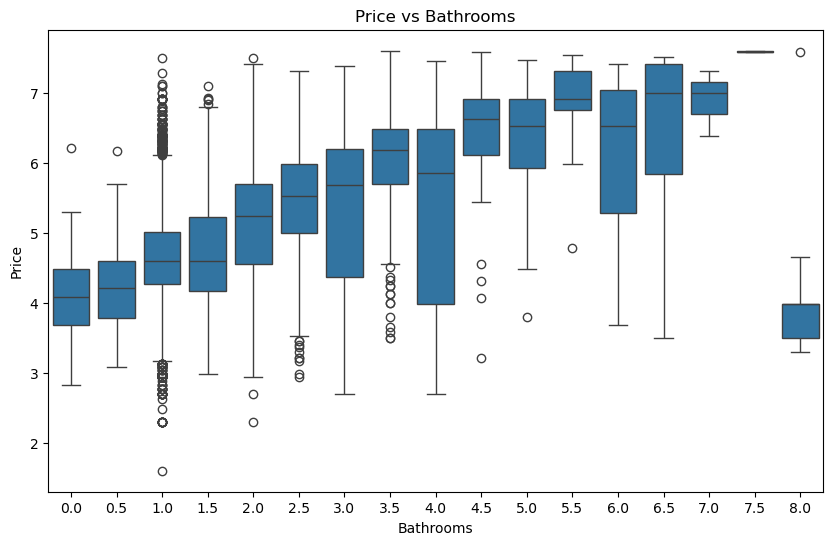

In [74]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='bathrooms', y='log_price')
plt.title('Price vs Bathrooms')
plt.xlabel('Bathrooms')
plt.ylabel('Price')
plt.show()

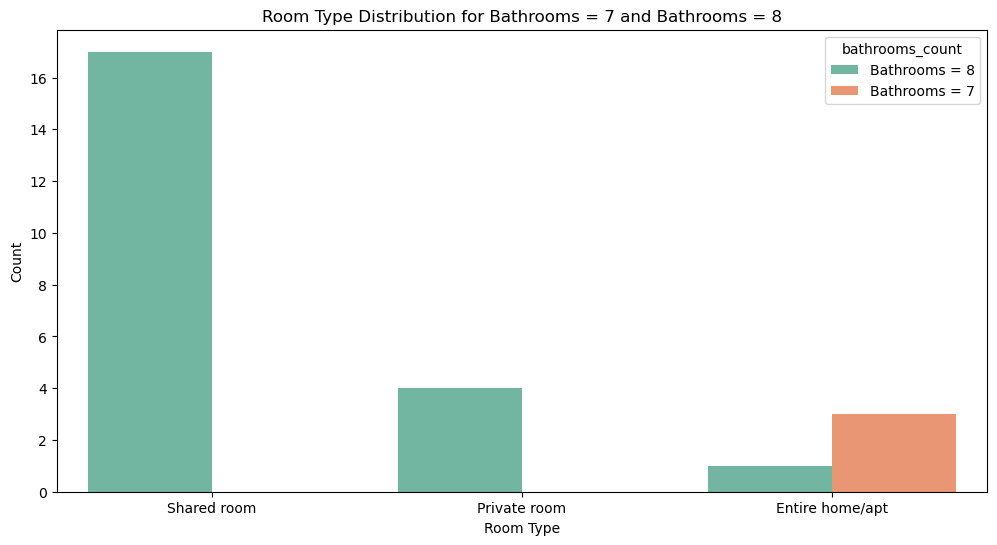

In [75]:
df['bathrooms_count'] = df['bathrooms'].apply(lambda x: 'Bathrooms = 7' if x == 7 else ('Bathrooms = 8' if x == 8 else 'Other'))

bathrooms_7_8 = df[df['bathrooms_count'].isin(['Bathrooms = 7', 'Bathrooms = 8'])]

# 绘制柱状图
plt.figure(figsize=(12, 6))
sns.countplot(x='room_type', hue='bathrooms_count', data=bathrooms_7_8, palette='Set2')
plt.title('Room Type Distribution for Bathrooms = 7 and Bathrooms = 8')
plt.xlabel('Room Type')
plt.ylabel('Count')
plt.show()

bedrooms and beds

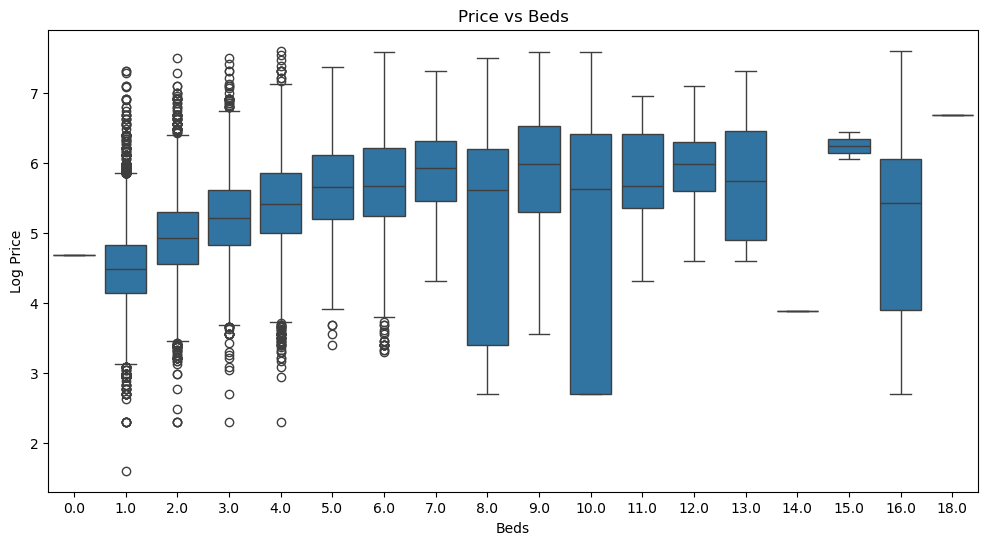

In [79]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='beds', y='log_price')
plt.title('Price vs Beds')
plt.xlabel('Beds')
plt.ylabel('Log Price')
plt.show()

In [81]:
zero_beds = df[(df['beds'] == 0)]

print(zero_beds['bed_type'].value_counts())

bed_type
Real Bed    1
Name: count, dtype: int64


beds
1.0     22607
2.0      9056
3.0      3672
4.0      1712
5.0       714
6.0       359
7.0       111
8.0       105
10.0       56
9.0        43
12.0       19
16.0       19
11.0       15
13.0        8
15.0        2
14.0        1
18.0        1
Name: count, dtype: int64
0


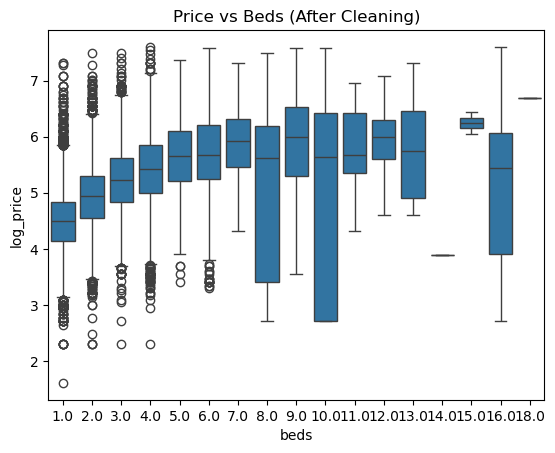

In [83]:
df_cleaned = df[(df['beds'] != 0) ] #delete values where beds=0
print(df_cleaned['beds'].value_counts()) #check 
print(df_cleaned['beds'].isnull().sum()) 

sns.boxplot(data=df_cleaned, x='beds', y='log_price')
plt.title("Price vs Beds (After Cleaning)")
plt.show()

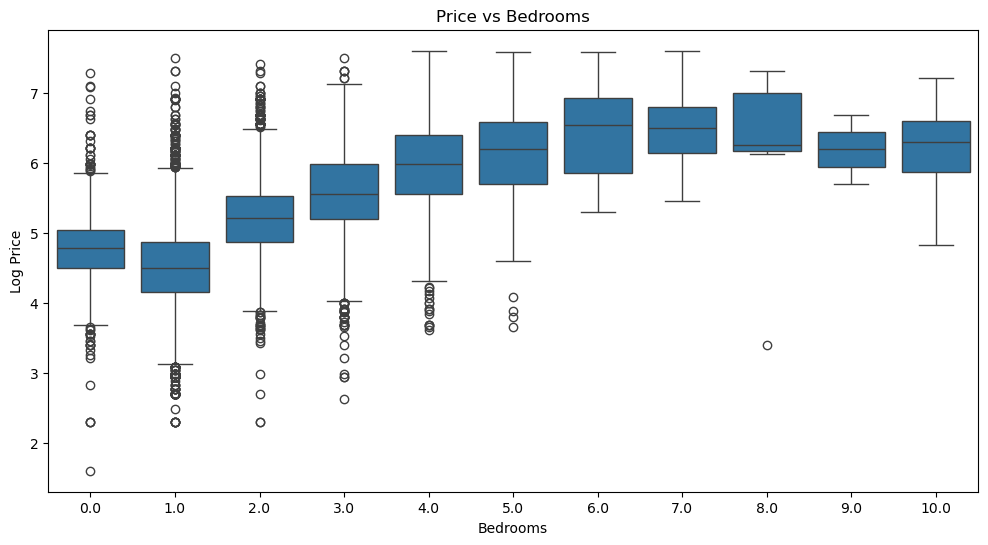

In [85]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='bedrooms', y='log_price')
plt.title('Price vs Bedrooms')
plt.xlabel('Bedrooms')
plt.ylabel('Log Price')
plt.show()


Amenities 

In [88]:
#amenities
df['amenities_list'] = df['amenities'].apply(lambda x: [item.strip('"') for item in x.strip('{}').split(',')]) 

exploded_df = df.explode('amenities_list')

amenities_counts = exploded_df['amenities_list'].value_counts()

print(amenities_counts.head(50))


amenities_list
Wireless Internet                             37793
Heating                                       36256
Kitchen                                       35040
Essentials                                    34885
Smoke detector                                33538
Air conditioning                              29472
Hangers                                       29001
Shampoo                                       28091
TV                                            27816
Carbon monoxide detector                      27083
Hair dryer                                    26301
Iron                                          25403
Laptop friendly workspace                     25255
Internet                                      23948
Washer                                        21546
Dryer                                         21414
Family/kid friendly                           20238
Fire extinguisher                             17971
First aid kit                                 164

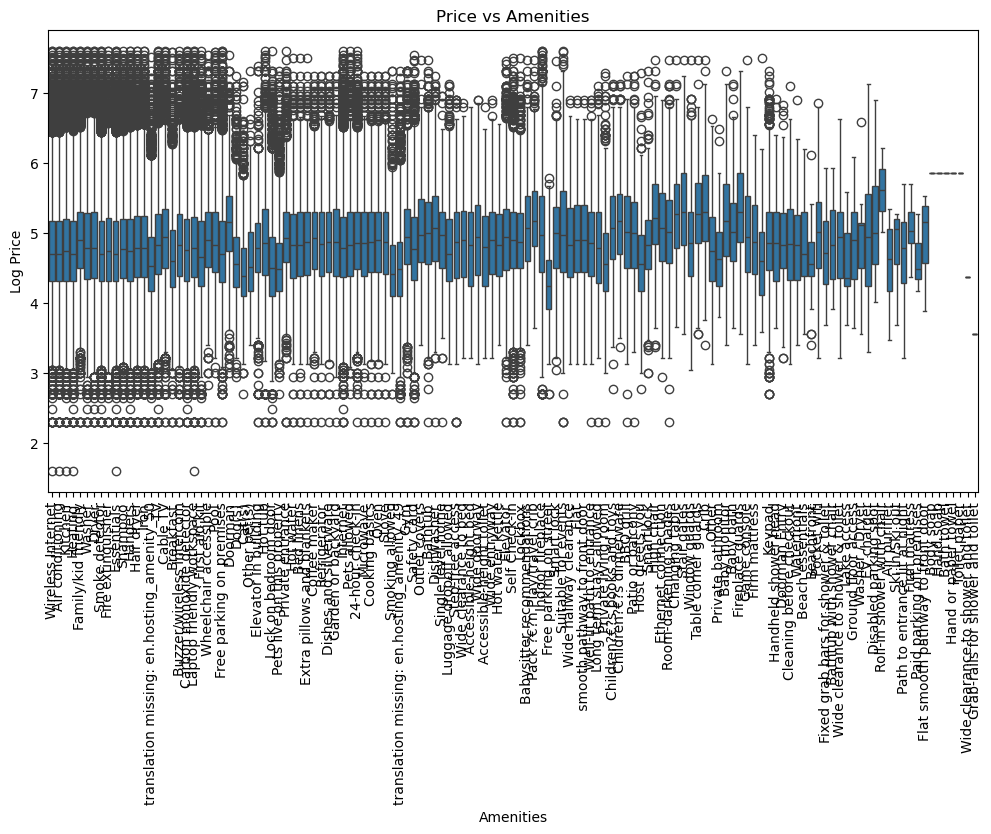

In [89]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=exploded_df, x='amenities_list', y='log_price')
plt.title('Price vs Amenities')
plt.xlabel('Amenities')
plt.ylabel('Log Price')
plt.xticks(rotation=90)  # 为了便于阅读，旋转x轴标签
plt.show()

In [92]:
top_50_amenities = amenities_counts.head(50).index.tolist()

def count_top_50_amenities(amenities_list, top_50_amenities):
    return len([item for item in amenities_list if item in top_50_amenities])

df['top_50_amenities_count'] = df['amenities_list'].apply(lambda x: count_top_50_amenities(x, top_50_amenities))

result_df = df[['name', 'log_price', 'top_50_amenities_count']]
sorted_df = result_df.sort_values(by='top_50_amenities_count', ascending=False)

print(sorted_df)  

                                                    name  log_price  \
43630         Sunny Designer Room in Luxury SF Apartment   4.997212   
32912  Spacious space with private yard/jacuzzi/entrance   5.010635   
66651   Brand New, Spacious 2 Bedroom Apt Near Times Squ   5.703782   
29433                    Stunning Views in Russian Hill!   5.164786   
31097  10mins to Manhattan, 59th St, 17mins Times Squ...   4.369448   
...                                                  ...        ...   
38952                  Private Bedroom #2 w/ Shared Bath   4.430817   
69344                       Dupont South Private Suite 2   4.605170   
35211                            Luxury Private room NYC   4.941642   
20905     CrashPadsUSA for Airline Crew. Nightly HOTBEDS   3.806662   
65385                 Private room - cozy peaceful relax   3.912023   

       top_50_amenities_count  
43630                      44  
32912                      42  
66651                      40  
29433              

C:\Users\sylvi\AppData\Local\Temp\ipykernel_6172\3434750296.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result_df.loc[:, 'top_50_amenities_count_group'] = pd.cut(result_df['top_50_amenities_count'], bins=bins, labels=labels)


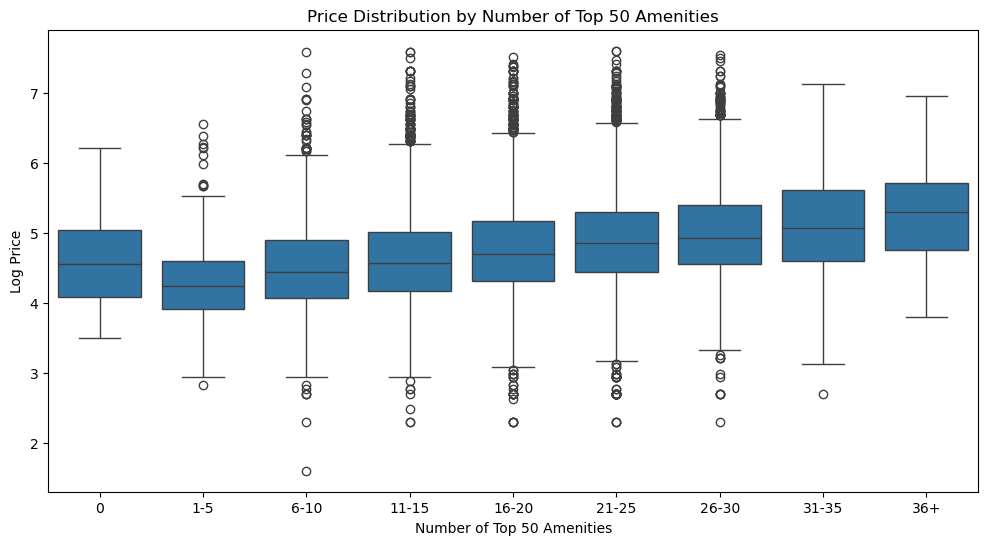

In [94]:
# 自定义区间和标签
bins = [0, 1, 5, 10, 15, 20, 25, 30, 35,50]  # 根据实际数据调整区间
labels = ['0', '1-5', '6-10', '11-15', '16-20', '21-25', '26-30', '31-35', '36+']  # 给每个区间添加标签

# 使用 .loc 修改 DataFrame 的内容，避免警告
result_df.loc[:, 'top_50_amenities_count_group'] = pd.cut(result_df['top_50_amenities_count'], bins=bins, labels=labels)

# 将分组列转换为类别类型
result_df.loc[:, 'top_50_amenities_count_group'] = result_df['top_50_amenities_count_group'].astype('category')

# 绘制箱型图
plt.figure(figsize=(12, 6))
sns.boxplot(data=result_df, x='top_50_amenities_count_group', y='log_price')
plt.title('Price Distribution by Number of Top 50 Amenities')
plt.xlabel('Number of Top 50 Amenities')
plt.ylabel('Log Price')
plt.show()


In [96]:
# Filter the rows where the number of Top 50 Amenities is zero
zero_amenities_df = df[df['top_50_amenities_count'] == 0]

# Get the distribution of 'property_type' for these rows
property_type_zero_amenities = zero_amenities_df['property_type'].value_counts()

# Display the result
print(property_type_zero_amenities)


property_type
Apartment              36
House                  16
Other_low frequency     2
Other                   2
Bed & Breakfast         2
Condominium             1
Name: count, dtype: int64


cancellation policy

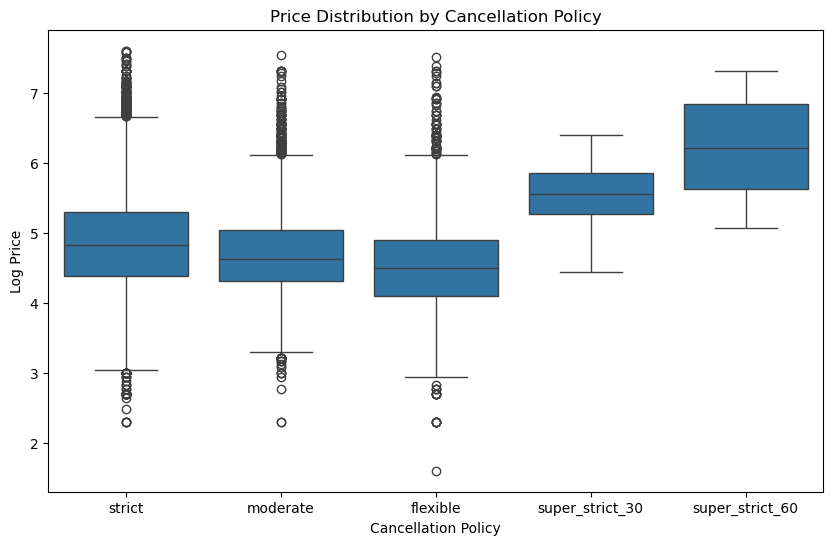

In [99]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='cancellation_policy', y='log_price')
plt.title('Price Distribution by Cancellation Policy')
plt.xlabel('Cancellation Policy')
plt.ylabel('Log Price')
plt.show()


instant_bookable

In [130]:
df['instant_bookable'] = df['instant_bookable'].map({'t': True, 'f': False})

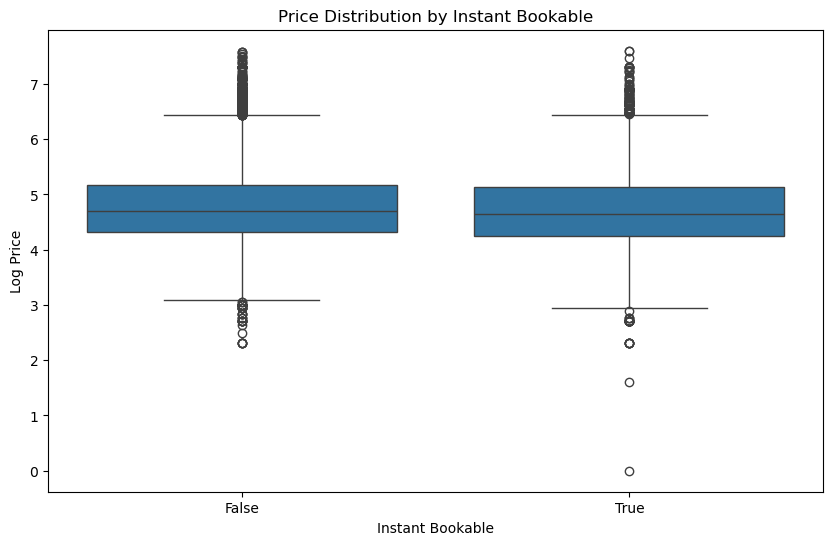

In [136]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='instant_bookable', y='log_price')
plt.title('Price Distribution by Instant Bookable')
plt.xlabel('Instant Bookable')
plt.ylabel('Log Price')
plt.show()


In [118]:
from scipy.stats import ttest_ind

true_prices = df[df['instant_bookable'] == True]['log_price']
false_prices = df[df['instant_bookable'] == False]['log_price']

t_stat, p_value = ttest_ind(true_prices, false_prices)
print(f"T-statistic: {t_stat}, P-value: {p_value}")


T-statistic: -7.310021068968863, P-value: 2.722818090927011e-13


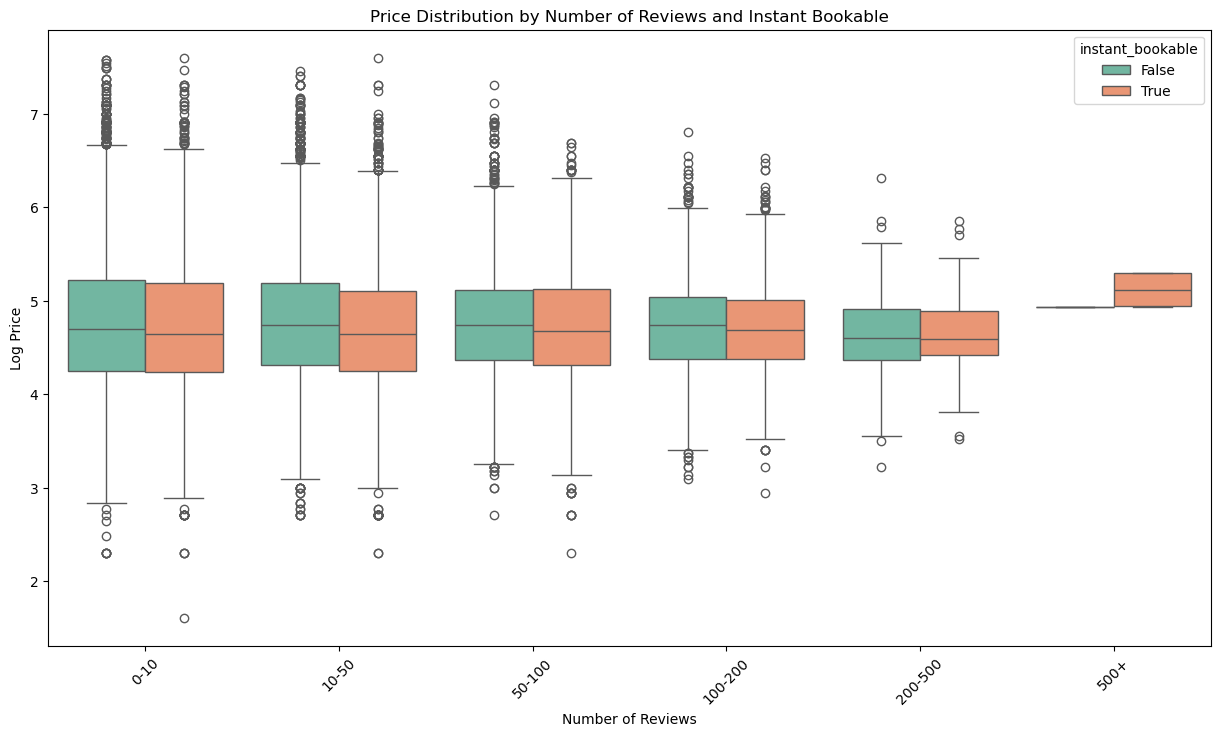

In [39]:
# 将 number_of_reviews 划分为不同区间
bins = [0, 10, 50, 100, 200, 500, 1000]  # 根据实际情况定义区间
labels = ['0-10', '10-50', '50-100', '100-200', '200-500', '500+']
df['reviews_group'] = pd.cut(df['number_of_reviews'], bins=bins, labels=labels, right=False)

# 绘制箱型图
plt.figure(figsize=(15, 8))
sns.boxplot(data=df, x='reviews_group', y='log_price', hue='instant_bookable', palette='Set2')

# 设置标题和标签
plt.title('Price Distribution by Number of Reviews and Instant Bookable')
plt.xlabel('Number of Reviews')
plt.ylabel('Log Price')
plt.xticks(rotation=45)
plt.show()


Location

In [41]:
import folium
from folium.plugins import HeatMap

map_center = [df_cleaned['latitude'].mean(), df_cleaned['longitude'].mean()]
m = folium.Map(location=map_center, zoom_start=5)

heat_data = [[row['latitude'], row['longitude'], row['log_price']] for index, row in df_cleaned.iterrows()]
HeatMap(heat_data).add_to(m)

city_data = df_cleaned.groupby('city')[['latitude', 'longitude']].mean().reset_index()  # 按城市计算经纬度均值
for index, row in city_data.iterrows():
    folium.CircleMarker(
        location=[row['latitude'], row['longitude']],
        radius=10,  
        color='blue',  
        fill=True,
        fill_color='cyan',  
        fill_opacity=0.6  
    ).add_to(m)

    folium.Marker(
        location=[row['latitude'], row['longitude']],
        icon=folium.DivIcon(
            html=f"""
            <div style="font-size: 12px; font-weight: bold; color: black; text-align: center;">
            {row['city']}
            </div>
            """
        )
    ).add_to(m)

m



In [42]:
from sklearn.neighbors import NearestNeighbors

# 修改后的 process_city 函数，包含图表修复
def process_city(df, city_name, radius=0.01, threshold=20, show_plot=True):

    df_city = df[df['city'] == city_name].copy()

    # 计算密度
    coordinates = df_city[['latitude', 'longitude']].values
    neighbors = NearestNeighbors(radius=radius)
    neighbors_fit = neighbors.fit(coordinates)
    density = neighbors_fit.radius_neighbors_graph(coordinates).sum(axis=1)
    df_city['density'] = np.array(density).flatten()

    # 划分 Dense 和 Sparse
    df_city['area_type'] = df_city['density'].apply(lambda x: 'Dense' if x > threshold else 'Sparse')

    # 图表绘制
    if show_plot:
        plt.figure(figsize=(10, 6))
        sns.scatterplot(data=df_city, x='longitude', y='latitude', hue='area_type', alpha=0.6)
        plt.title(f'Density clustering in {city_name}\n(radius={radius}, threshold={threshold})')
        plt.xlabel('Longitude')
        plt.ylabel('Latitude')
        plt.legend(title='Area Type')
        plt.show()

        plt.figure(figsize=(10, 6))
        sns.boxplot(data=df_city, x='area_type', y='log_price')
        plt.title(f'Price Distribution: Dense vs Sparse in {city_name}\n(radius={radius}, threshold={threshold})')
        plt.xlabel('Area Type')
        plt.ylabel('Log Price')
        plt.show()
    
    return df_city

# 优化参数函数
def tune_params(df, city_name, initial_radius=0.01, initial_threshold=20, target_dense_ratio=0.85):
    """
    动态调整参数并返回最优参数组和处理后的数据
    """
    radius = initial_radius
    threshold = initial_threshold
    best_result = None
    best_diff = float('inf')  # 用于记录与目标比例的差异
    results = []  # 用于记录每次调整的结果
    
    while True:
        processed_city = process_city(df, city_name=city_name, radius=radius, threshold=threshold, show_plot=False)
        dense_ratio = processed_city['area_type'].value_counts(normalize=True).get('Dense', 0)
        
        # 记录当前参数和比例
        diff = abs(dense_ratio - target_dense_ratio)
        results.append({'radius': radius, 'threshold': threshold, 'dense_ratio': dense_ratio, 'data': processed_city})
        
        # 更新最优结果
        if diff < best_diff:
            best_diff = diff
            best_result = {'radius': radius, 'threshold': threshold, 'data': processed_city}
        
        # 动态调整参数
        if dense_ratio > target_dense_ratio:  # Dense 比例过高
            radius -= 0.001
            threshold += 5
        else:  # Dense 比例过低
            radius += 0.001
            threshold -= 5

        # 防止参数越界
        radius = max(radius, 0.001)
        threshold = max(threshold, 5)
        
        # 如果调整无明显改善，终止
        if len(results) > 10 and diff >= best_diff:  # 控制调整次数
            break
    
    return best_result['data'], best_result['radius'], best_result['threshold']

# 批量处理城市
def process_all_cities(df, cities, target_dense_ratio=0.85):
    optimized_cities = []
    optimized_params = {}
    
    for city in cities:
        print(f"\n优化 {city} 的参数...")
        processed_city, optimal_radius, optimal_threshold = tune_params(df, city_name=city, target_dense_ratio=target_dense_ratio)
        optimized_cities.append(processed_city)
        optimized_params[city] = {'radius': optimal_radius, 'threshold': optimal_threshold}
    
    # 合并优化后的城市数据
    df_all_optimized = pd.concat(optimized_cities, ignore_index=True)
    
    # 输出最优参数
    print("\n各城市的最优参数:")
    for city, params in optimized_params.items():
        print(f"{city}: radius={params['radius']}, threshold={params['threshold']}")
    
    # 计算 Dense 和 Sparse 比例
    area_type_summary = df_all_optimized.groupby('city')['area_type'].value_counts(normalize=True).unstack()
    print("\n优化后的 Dense 和 Sparse 比例:")
    print(area_type_summary)
    
    return df_all_optimized, optimized_params, area_type_summary

# 调用主函数
cities = ['Boston', 'Chicago', 'DC', 'LA', 'NYC', 'SF']
df_all_optimized, optimized_params, area_type_summary = process_all_cities(df, cities)

# 输出数据和比例
print("\n最终优化结果：")
print(area_type_summary)



优化 Boston 的参数...

优化 Chicago 的参数...

优化 DC 的参数...

优化 LA 的参数...

优化 NYC 的参数...

优化 SF 的参数...

各城市的最优参数:
Boston: radius=0.008, threshold=30
Chicago: radius=0.01, threshold=20
DC: radius=0.009000000000000001, threshold=25
LA: radius=0.011, threshold=15
NYC: radius=0.006, threshold=40
SF: radius=0.007, threshold=35

优化后的 Dense 和 Sparse 比例:
area_type     Dense    Sparse
city                         
Boston     0.815222  0.184778
Chicago    0.817068  0.182932
DC         0.873807  0.126193
LA         0.816349  0.183651
NYC        0.851862  0.148138
SF         0.807553  0.192447

最终优化结果：
area_type     Dense    Sparse
city                         
Boston     0.815222  0.184778
Chicago    0.817068  0.182932
DC         0.873807  0.126193
LA         0.816349  0.183651
NYC        0.851862  0.148138
SF         0.807553  0.192447



优化 Boston 的参数...


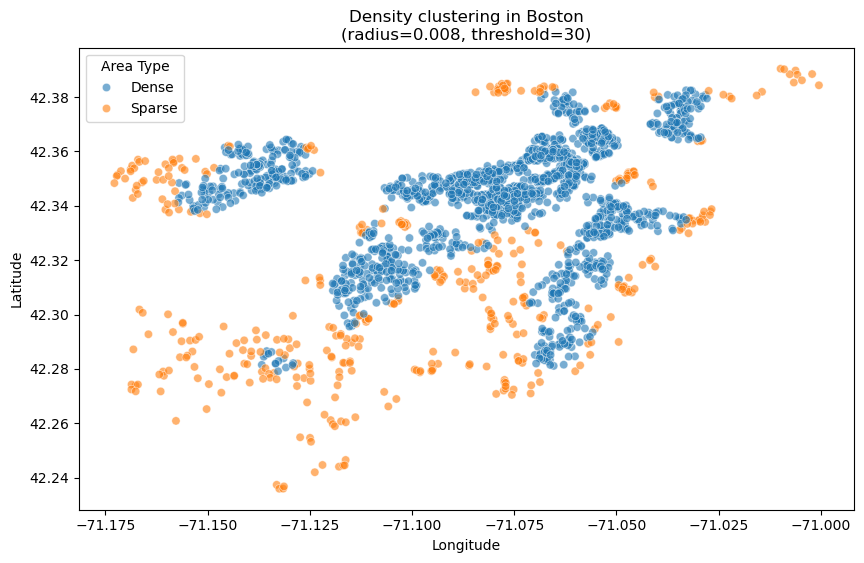

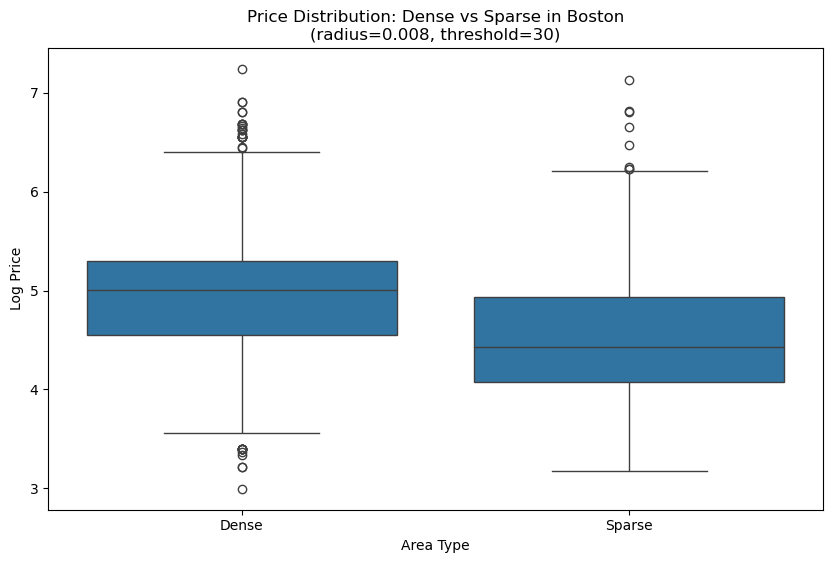


优化 Chicago 的参数...


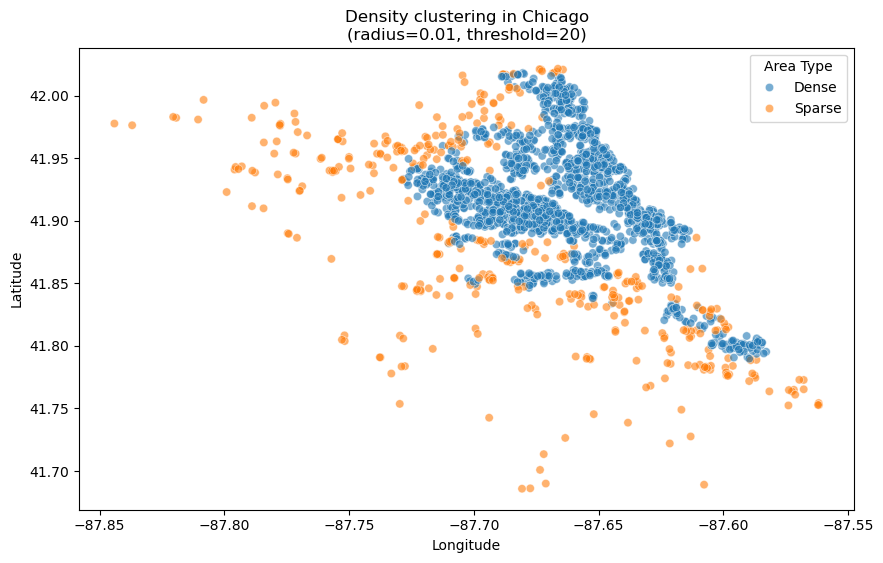

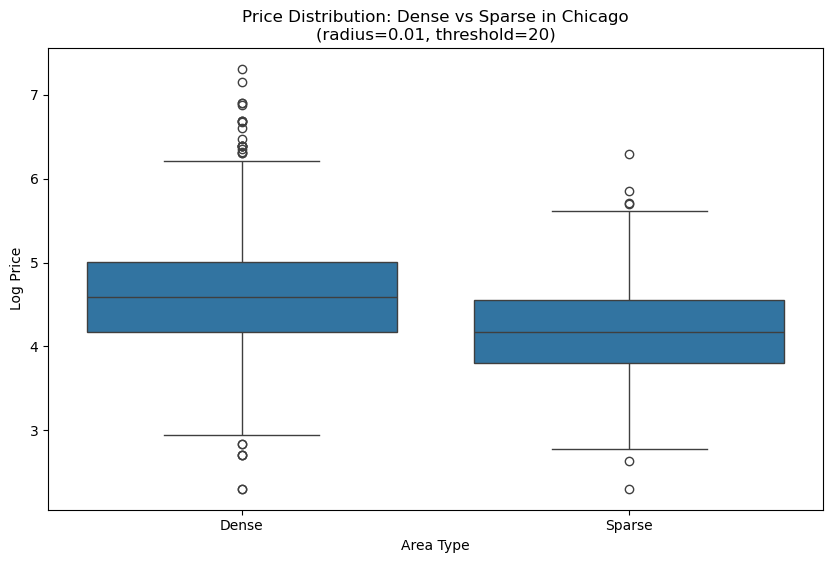


优化 DC 的参数...


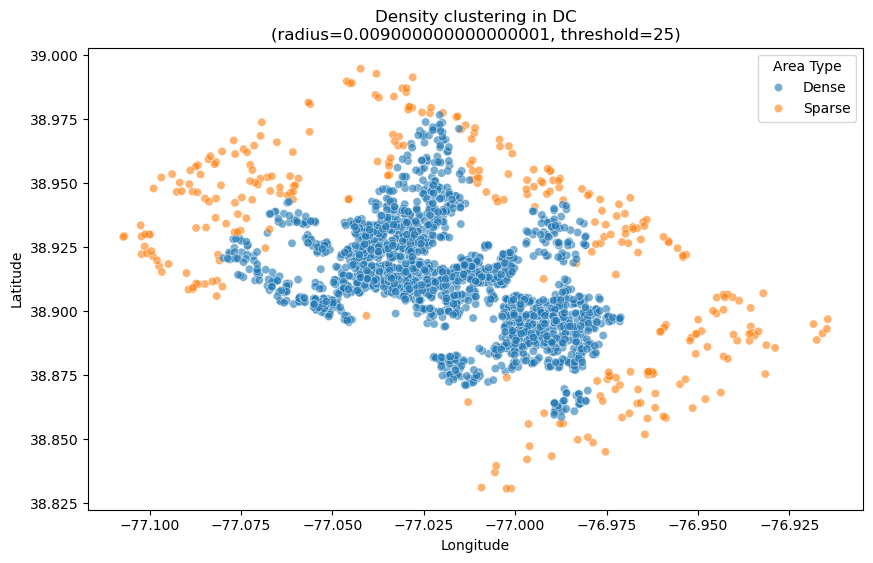

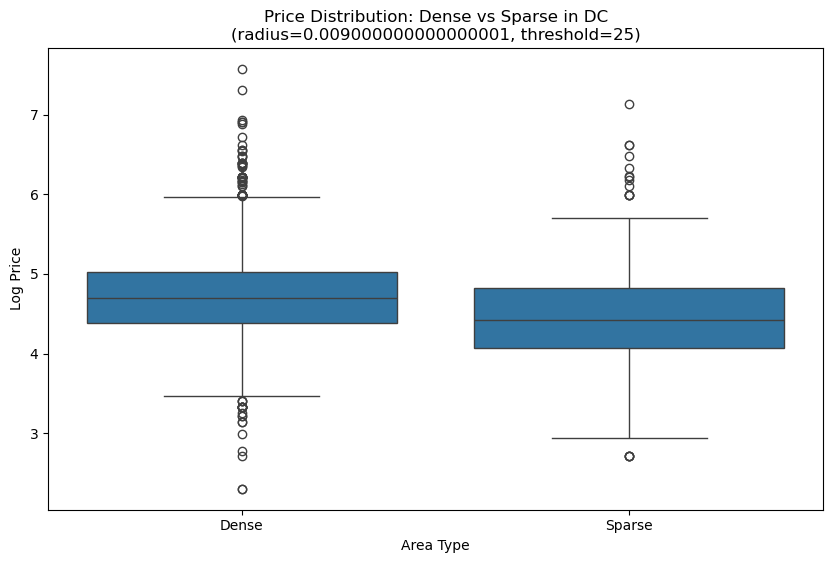


优化 LA 的参数...


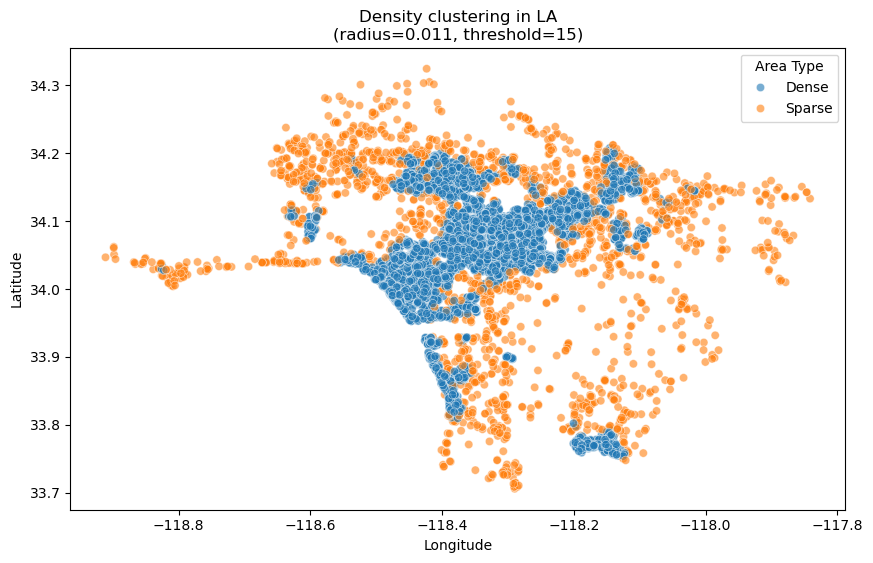

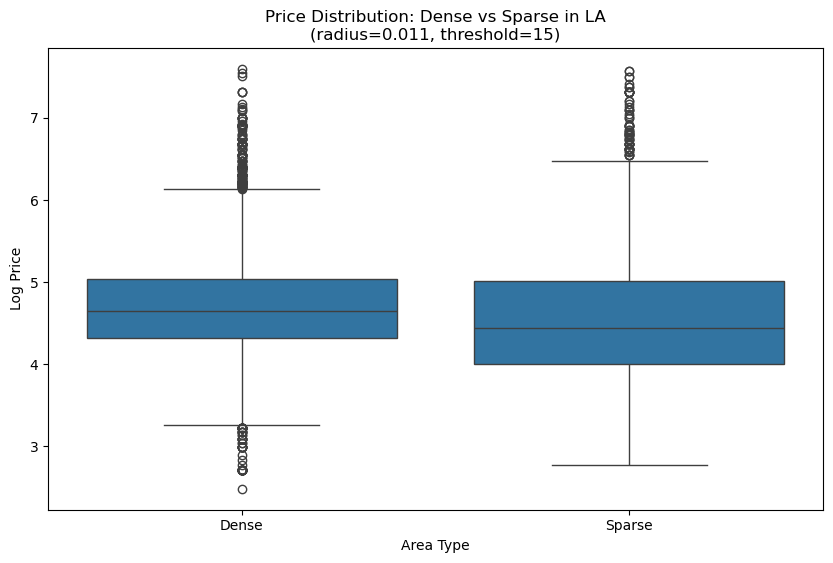


优化 NYC 的参数...


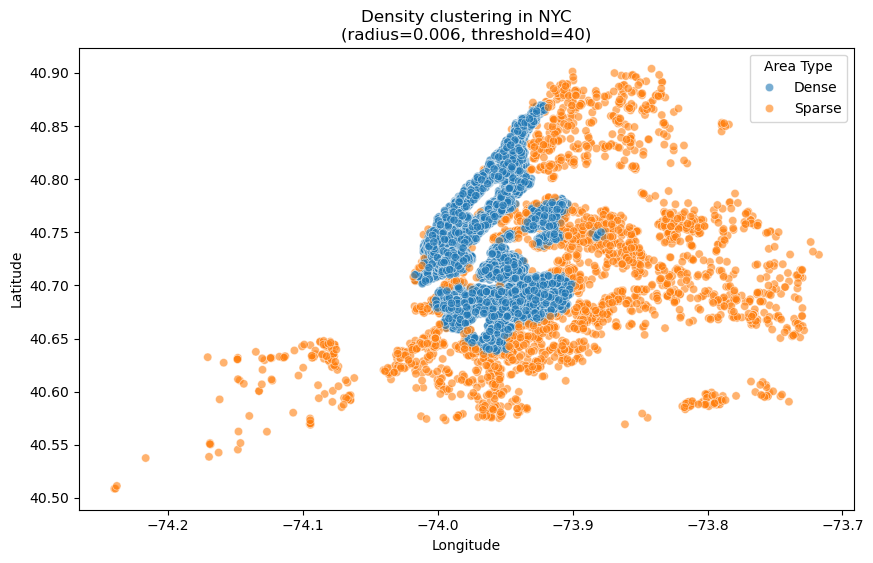

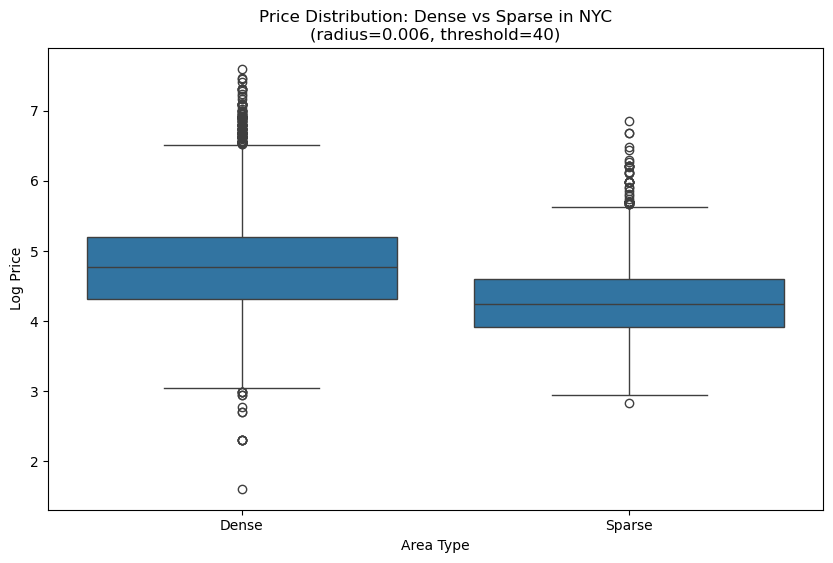


优化 SF 的参数...


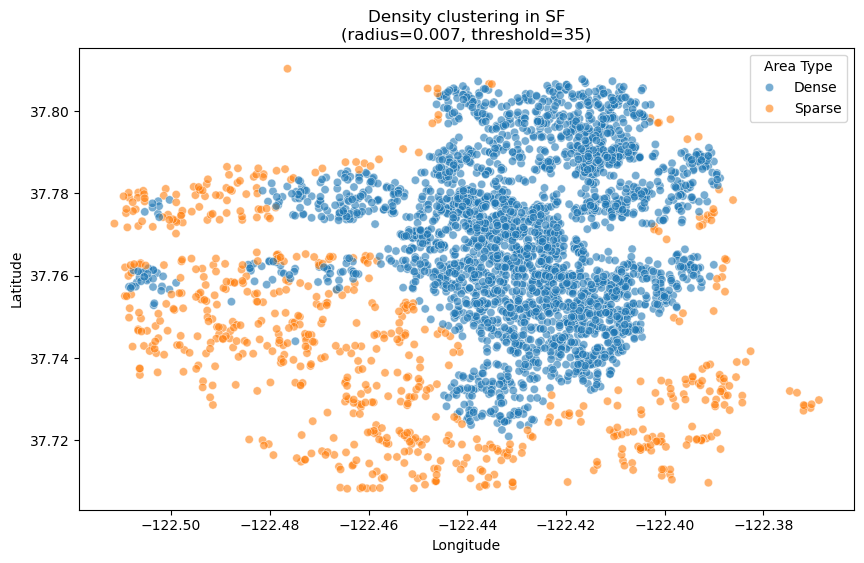

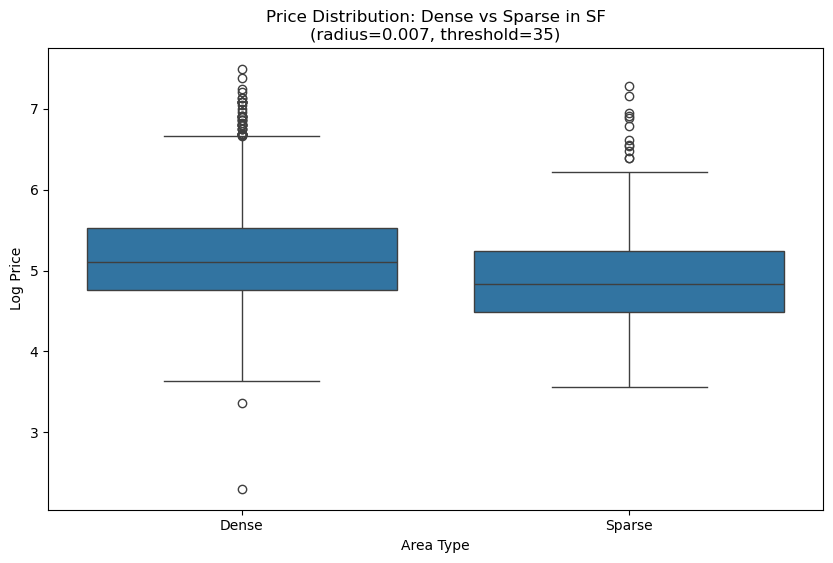


各城市的最优参数:
Boston: radius=0.008, threshold=30
Chicago: radius=0.01, threshold=20
DC: radius=0.009000000000000001, threshold=25
LA: radius=0.011, threshold=15
NYC: radius=0.006, threshold=40
SF: radius=0.007, threshold=35

优化后的 Dense 和 Sparse 比例:
area_type     Dense    Sparse
city                         
Boston     0.815222  0.184778
Chicago    0.817068  0.182932
DC         0.873807  0.126193
LA         0.816349  0.183651
NYC        0.851862  0.148138
SF         0.807553  0.192447


In [43]:
# 修改后的 process_all_cities 函数，确保每个城市的图表生成
def process_all_cities(df, cities, target_dense_ratio=0.85):
    optimized_cities = []
    optimized_params = {}
    
    for city in cities:
        print(f"\n优化 {city} 的参数...")
        processed_city, optimal_radius, optimal_threshold = tune_params(df, city_name=city, target_dense_ratio=target_dense_ratio)
        optimized_cities.append(processed_city)
        optimized_params[city] = {'radius': optimal_radius, 'threshold': optimal_threshold}

        # 在优化参数后为每个城市生成图表
        process_city(df, city_name=city, radius=optimal_radius, threshold=optimal_threshold, show_plot=True)
    
    # 合并优化后的城市数据
    df_all_optimized = pd.concat(optimized_cities, ignore_index=True)
    
    # 输出最优参数
    print("\n各城市的最优参数:")
    for city, params in optimized_params.items():
        print(f"{city}: radius={params['radius']}, threshold={params['threshold']}")
    
    # 计算 Dense 和 Sparse 比例
    area_type_summary = df_all_optimized.groupby('city')['area_type'].value_counts(normalize=True).unstack()
    print("\n优化后的 Dense 和 Sparse 比例:")
    print(area_type_summary)
    
    return df_all_optimized, optimized_params, area_type_summary

# 调用主函数
cities = ['Boston', 'Chicago', 'DC', 'LA', 'NYC', 'SF']
df_all_optimized, optimized_params, area_type_summary = process_all_cities(df, cities, target_dense_ratio=0.85)


In [44]:
import numpy as np
import pandas as pd
from scipy.stats import shapiro, levene, ttest_ind, mannwhitneyu

def compare_dense_sparse(df):
    # 提取 Dense 和 Sparse 的价格分布
    dense_prices = df[df['area_type'] == 'Dense']['log_price']
    sparse_prices = df[df['area_type'] == 'Sparse']['log_price']

    # 1. 正态性检验
    p_dense = shapiro(dense_prices)[1]
    p_sparse = shapiro(sparse_prices)[1]
    print(f"Dense Group: Shapiro p-value = {p_dense}")
    print(f"Sparse Group: Shapiro p-value = {p_sparse}")

    # 2. 方差齐性检验
    p_var = levene(dense_prices, sparse_prices)[1]
    print(f"Levene Test: p-value = {p_var}")

    # 3. 差异显著性检验
    if p_dense > 0.05 and p_sparse > 0.05 and p_var > 0.05:
        # 正态分布且方差齐
        t_stat, p_value = ttest_ind(dense_prices, sparse_prices, equal_var=True)
        test_type = "T-test (equal variance)"
    elif p_dense > 0.05 and p_sparse > 0.05:
        # 正态分布但方差不齐
        t_stat, p_value = ttest_ind(dense_prices, sparse_prices, equal_var=False)
        test_type = "Welch's T-test (unequal variance)"
    else:
        # 非正态分布，使用非参数检验
        t_stat, p_value = mannwhitneyu(dense_prices, sparse_prices, alternative='two-sided')
        test_type = "Mann-Whitney U Test (non-parametric)"

    # 结果输出
    print(f"\n{test_type}: statistic = {t_stat}, p-value = {p_value}")
    if p_value < 0.05:
        print("Statistically significant difference between Dense and Sparse.")
    else:
        print("No statistically significant difference between Dense and Sparse.")

# 使用优化后的数据进行检验
compare_dense_sparse(df_all_optimized)


Dense Group: Shapiro p-value = 1.437584124245685e-38
Sparse Group: Shapiro p-value = 2.6140509363084706e-41
Levene Test: p-value = 1.586544300032068e-05

Mann-Whitney U Test (non-parametric): statistic = 133558009.5, p-value = 0.0
Statistically significant difference between Dense and Sparse.


C:\Users\sylvi\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 32170.
  res = hypotest_fun_out(*samples, **kwds)
C:\Users\sylvi\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 6331.
  res = hypotest_fun_out(*samples, **kwds)


Activity Level

In [187]:
df.dropna(subset=['first_review', 'last_review','host_since'], inplace=True) #delete missing value

In [189]:
#lifecycle房源生命周期
df['first_review'] = pd.to_datetime(df['first_review'], dayfirst=True, errors='coerce')
df['last_review'] = pd.to_datetime(df['last_review'], dayfirst=True, errors='coerce')


df['active_days'] = (df['last_review'] - df['first_review']).dt.days

print(df[['first_review', 'last_review', 'active_days']].head())

  first_review last_review  active_days
1   2017-08-05  2017-09-23           49
2   2017-04-30  2017-09-14          137
5   2017-08-27  2017-09-05            9
7   2016-12-16  2017-04-12          117
8   2016-02-13  2017-09-24          589


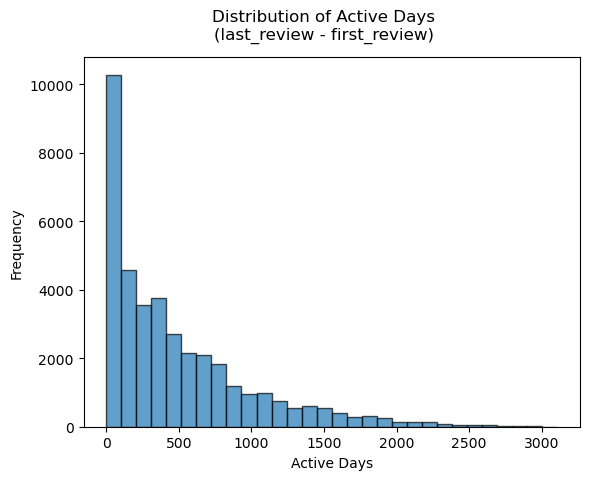

In [191]:
plt.hist(df['active_days'].dropna(), bins=30, edgecolor='black', alpha=0.7)
plt.suptitle('Distribution of Active Days\n(last_review - first_review)', fontsize=12)  
plt.xlabel('Active Days')
plt.ylabel('Frequency')
plt.show()

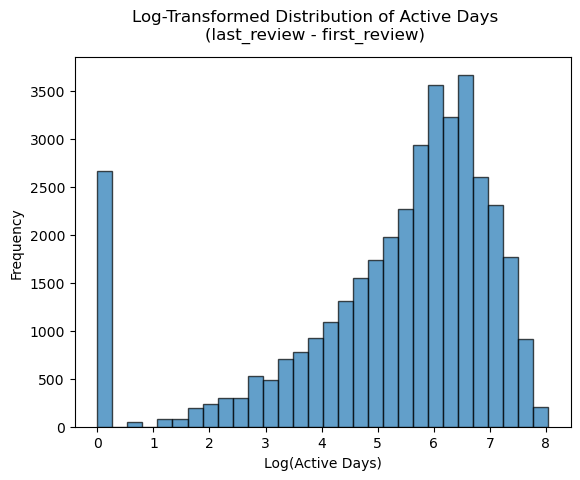

In [193]:
df['log_active_days'] = np.log1p(df['active_days'])

plt.hist(df['log_active_days'].dropna(), bins=30, edgecolor='black', alpha=0.7)
plt.suptitle('Log-Transformed Distribution of Active Days\n(last_review - first_review)', fontsize=12) 
plt.xlabel('Log(Active Days)')
plt.ylabel('Frequency')
plt.show()


In [195]:
df['first_review'] = pd.to_datetime(df['first_review'], errors='coerce', dayfirst=True)
df['host_since'] = pd.to_datetime(df['host_since'], errors='coerce', dayfirst=True)

df['days_since_host'] = (df['first_review'] - df['host_since']).dt.days

df['is_new_listing'] = (df['active_days'] == 0) & (df['days_since_host'] <= 30)

print(df[['active_days', 'first_review', 'host_since', 'is_new_listing']].head())
new_listing_counts = df['is_new_listing'].value_counts()
print(new_listing_counts)

   active_days first_review host_since  is_new_listing
1           49   2017-08-05 2017-06-19           False
2          137   2017-04-30 2016-10-25           False
5            9   2017-08-27 2017-06-07           False
7          117   2016-12-16 2013-05-18           False
8          589   2016-02-13 2015-06-04           False
is_new_listing
False    38302
True       199
Name: count, dtype: int64


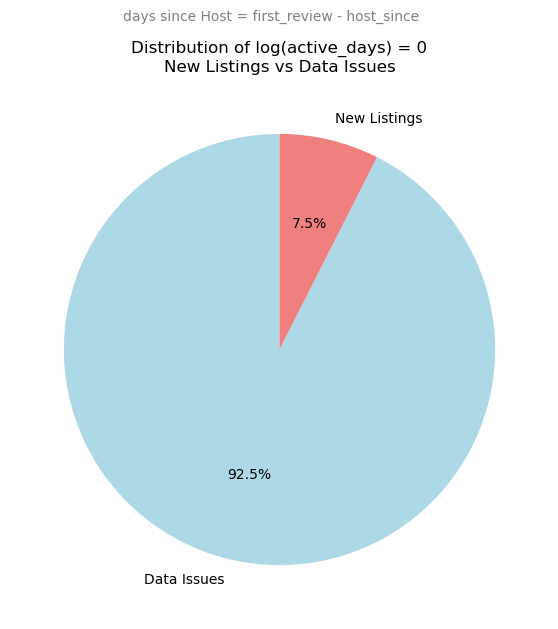

In [197]:
log_active_zero = df[df['log_active_days'] == 0]

new_listing_counts = log_active_zero['is_new_listing'].value_counts()

plt.figure(figsize=(7, 7))
new_listing_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['lightblue', 'lightcoral'], labels=['Data Issues', 'New Listings'])
plt.title('Distribution of log(active_days) = 0\nNew Listings vs Data Issues')
plt.suptitle('days since Host = first_review - host_since', fontsize=10, color='gray')  # 添加副标题
plt.ylabel('')  # 不显示y轴标签
plt.show()


         id  active_days  log_active_days  is_new_listing
1   6304928           49         3.912023           False
2   7919400          137         4.927254           False
5  12422935            9         2.302585           False
7  13971273          117         4.770685           False
8    180792          589         6.380123           False
Original data size: 38501
Cleaned data size: 36037
Rows deleted: 2464


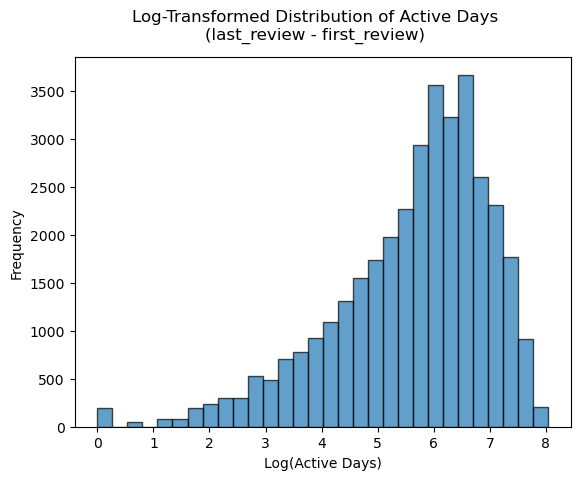

In [199]:
rows_to_delete = (df['log_active_days'] == 0) & (df['is_new_listing'] == False)#delete

df_cleaned = df[~rows_to_delete]

print(df_cleaned[['id','active_days', 'log_active_days', 'is_new_listing']].head())

print(f"Original data size: {df.shape[0]}")#check
print(f"Cleaned data size: {df_cleaned.shape[0]}")

deleted_rows = df.shape[0] - df_cleaned.shape[0]
print(f"Rows deleted: {deleted_rows}")


plt.hist(df_cleaned['log_active_days'].dropna(), bins=30, edgecolor='black', alpha=0.7)
plt.suptitle('Log-Transformed Distribution of Active Days\n(last_review - first_review)', fontsize=12)
plt.xlabel('Log(Active Days)')
plt.ylabel('Frequency')
plt.show()

In [201]:
print(df.columns)  # 检查 df 中的所有列
print(df[['city', 'area_type']].head())  

plt.figure(figsize=(10, 6))
sns.boxplot(x='area_type', y='log_active_days', data=df_cleaned)
plt.title('Active Days by Area Type')
plt.xlabel('Area Type')
plt.ylabel('Active Days')
plt.show()

Index(['id', 'log_price', 'property_type', 'room_type', 'amenities',
       'accommodates', 'bathrooms', 'bed_type', 'cancellation_policy',
       'cleaning_fee', 'city', 'description', 'first_review',
       'host_has_profile_pic', 'host_identity_verified', 'host_response_rate',
       'host_since', 'instant_bookable', 'last_review', 'latitude',
       'longitude', 'name', 'neighbourhood', 'number_of_reviews',
       'review_scores_rating', 'thumbnail_url', 'zipcode', 'bedrooms', 'beds',
       'active_days', 'log_active_days', 'days_since_host', 'is_new_listing'],
      dtype='object')


KeyError: "['area_type'] not in index"

Customer review score

In [154]:

df['customer_review_score'] = (df['number_of_reviews'] * df['review_scores_rating']) / df['number_of_reviews']
print(df['customer_review_score'].describe())

count    38502.000000
mean        94.332217
std          6.876715
min         20.000000
25%         92.000000
50%         96.000000
75%         99.000000
max        100.000000
Name: customer_review_score, dtype: float64


In [156]:
df['review_score_category'] = pd.qcut(df['customer_review_score'], 
                                      q=3, 
                                      labels=['Low', 'Medium', 'High'])


print(df['review_score_category'].value_counts())

review_score_category
Medium    14238
Low       12872
High      11392
Name: count, dtype: int64


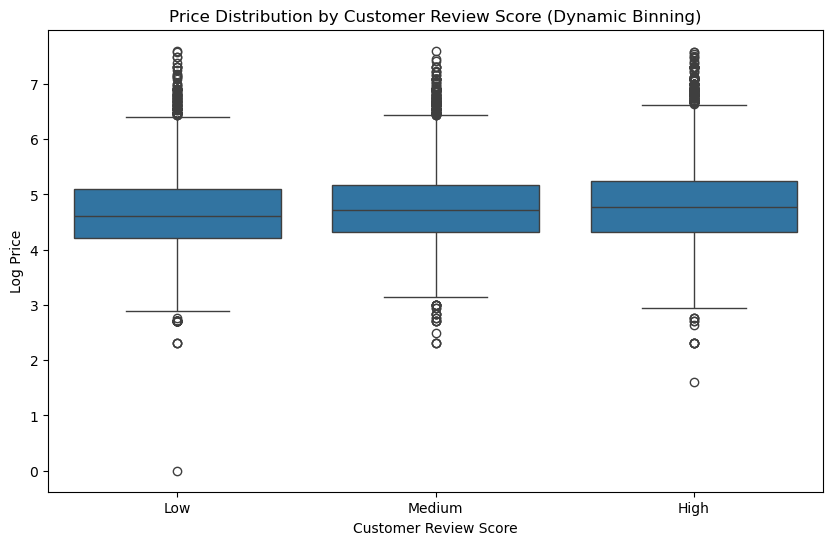

In [158]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='review_score_category', y='log_price')
plt.title('Price Distribution by Customer Review Score (Dynamic Binning)')
plt.xlabel('Customer Review Score')
plt.ylabel('Log Price')
plt.show()


In [160]:
from scipy.stats import ttest_ind

low_prices = df[df['review_score_category'] == 'Low']['log_price']
medium_prices = df[df['review_score_category'] == 'Medium']['log_price']
high_prices = df[df['review_score_category'] == 'High']['log_price']

t_stat_1, p_value_1 = ttest_ind(low_prices, medium_prices)
t_stat_2, p_value_2 = ttest_ind(medium_prices, high_prices)
t_stat_3, p_value_3 = ttest_ind(low_prices, high_prices)

print(f"Low vs Medium: T-statistic = {t_stat_1}, P-value = {p_value_1}")
print(f"Medium vs High: T-statistic = {t_stat_2}, P-value = {p_value_2}")
print(f"Low vs High: T-statistic = {t_stat_3}, P-value = {p_value_3}")


Low vs Medium: T-statistic = -11.187783343342756, P-value = 5.417341771882499e-29
Medium vs High: T-statistic = -5.781059868964965, P-value = 7.509230704730185e-09
Low vs High: T-statistic = -15.40448965435027, P-value = 2.7307390907950694e-53


In [215]:
# 清理数据
df['host_response_rate'] = df['host_response_rate'].str.replace('%', '').astype(float)  # 移除百分号并转换为浮动数值
df['host_has_profile_pic'] = df['host_has_profile_pic'].map({'t': True, 'f': False})  # 转换为布尔型
df['host_identity_verified'] = df['host_identity_verified'].map({'t': True, 'f': False})  # 转换为布尔型

# 创建一个新的变量，表示房东的表现（综合评分）
df['host_performance'] = df['host_has_profile_pic'] + df['host_identity_verified'] + (df['host_response_rate'] / 100)

# 检查数据
print(df[['host_response_rate', 'host_has_profile_pic', 'host_identity_verified', 'host_performance']].head())

# 可视化：房东表现与价格之间的关系
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='host_performance', y='log_price')
plt.title('Price Distribution by Host Performance')
plt.xlabel('Host Performance')
plt.ylabel('Log Price')
plt.show()



AttributeError: Can only use .str accessor with string values!